In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

*Data visulization and features extraction*

In [2]:
data=pd.read_csv('/content/titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.Survived.unique()

array([0, 1])

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Create a new feature 'Family size' from the features 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [8]:
# Remove unnecessary columns
data = data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [9]:
# Map 'Sex' and 'Embarked' to numerical values
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [10]:
# Preprocess name and retrieve Title
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data = data.drop(columns='Name')

In [11]:
# For Title, combine some of the classes and group all the rare classes into 'Others'.
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].replace('Mlle', 'Miss')

In [12]:
# Map Title to numerical values
data['Title'] = data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [13]:
# Fill NA in Embarked column with majority class
data['Embarked'] = data['Embarked'].fillna(2)

In [14]:
# Fill Age with the median age of similar rows from 'Pclass', 'SibSp' and 
# 'Parch'. If there are no similar rows, fill the age with the median age of 
# total dataset.
NaN_indexes = data['Age'][data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = data['Age'][((data.SibSp == data.iloc[i]["SibSp"]) & (data.Parch == data.iloc[i]["Parch"]) & (data.Pclass == data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        data['Age'].iloc[i] = pred_age
    else:
        data['Age'].iloc[i] = data['Age'].median()

In [15]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2
5,0,3,0,26.0,0,0,8.4583,1.0,1,2
6,0,1,0,54.0,0,0,51.8625,2.0,1,2
7,0,3,0,2.0,3,1,21.0750,2.0,5,0
8,1,3,1,27.0,0,2,11.1333,2.0,3,3
9,1,2,1,14.0,1,0,30.0708,0.0,2,3


In [16]:
X = data.drop(columns='Survived')
y = data.Survived

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,35.0,1,0,53.1000,2.0,2,3
4,3,0,35.0,0,0,8.0500,2.0,1,2
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2.0,1,4
887,1,1,19.0,0,0,30.0000,2.0,1,1
888,3,1,13.5,1,2,23.4500,2.0,4,1
889,1,0,26.0,0,0,30.0000,0.0,1,2


In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [20]:
!pip install simulated_annealing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install simanneal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from simanneal import Annealer

*Method Used for Training model*

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, KFold

def train_model(X, y):
    """
    Run random forest classification model on feature subset
    and retrieve cross validated ROC-AUC score
    """
    clf = LogisticRegression(random_state=42)
    kf = KFold(shuffle=True, n_splits=3, random_state=42)
    cv_roc_auc_score = round(cross_val_score(clf, X, y.values.ravel(), cv=kf, 
                                             scoring="roc_auc", n_jobs=-1).mean(), 3)

    return cv_roc_auc_score

*Simulated annealing Implementation*

In [24]:
import numpy as np
import random
from datetime import datetime as dt

# Setup simulated annealing algorithm
def simulated_annealing(X_train,
                        y_train,
                        maxiters=50,
                        alpha=0.85,
                        beta=1,
                        T_0=1,
                        update_iters=1,
                        temp_reduction='geometric'):
    """
    Function to perform feature selection using simulated annealing
    Inputs:
    X_train: Predictor features
    y_train: Train labels
    maxiters: Maximum number of iterations
    alpha: Factor to reduce temperature
    beta: Constant in probability estimate 
    T_0: Initial temperature
    update_iters: Number of iterations required to update temperature
    temp_reduction: Strategy for temperature reduction schedule
    Output:
    1) Dataframe of parameters explored and corresponding model performance
    2) Best metric score (i.e. AUC score in this case)
    3) List of subset features that correspond to the best metric
    """
    columns = ['Iteration', 'Feature Count', 'Feature Set', 
               'Metric', 'Best Metric', 'Acceptance Probability', 
               'Random Number', 'Outcome']
    results = pd.DataFrame(index=range(maxiters), columns=columns)
    best_subset = None
    hash_values = set()
    T = T_0

    # Get ascending range indices of all columns
    full_set = set(np.arange(len(X_train.columns)))

    # Generate initial random subset based on ~50% of columns
    curr_subset = set(random.sample(list(full_set), round(0.5 * len(full_set))))

    # Get baseline metric score (i.e. AUC) of initial random subset
    X_curr = X_train.iloc[:, list(curr_subset)]
    prev_metric = train_model(X_curr, y_train)
    best_metric = prev_metric

    for i in range(maxiters):
        # Termination conditions
        if T < 0.01:
            print(f'Temperature {T} below threshold. Termination condition met')
            break
        
        print(f'Starting Iteration {i+1}')

        # Execute pertubation (i.e. alter current subset to get new subset)
        while True:
            # Decide what type of pertubation to make
            if len(curr_subset) == len(full_set): 
                move = 'Remove'
            elif len(curr_subset) == 2: # Not to go below 2 features
                move = random.choice(['Add', 'Replace'])
            else:
                move = random.choice(['Add', 'Replace', 'Remove'])
            
            # Get columns not yet used in current subset
            pending_cols = full_set.difference(curr_subset) 
            new_subset = curr_subset.copy()   

            if move == 'Add':        
                new_subset.add(random.choice(list(pending_cols)))
            elif move == 'Replace': 
                new_subset.remove(random.choice(list(curr_subset)))
                new_subset.add(random.choice(list(pending_cols)))
            else:
                new_subset.remove(random.choice(list(curr_subset)))
                
            if new_subset in hash_values:
                print('Subset already visited')
            else:
                hash_values.add(frozenset(new_subset))
                break

        # Filter dataframe to current subset
        X_new = X_train.iloc[:, list(new_subset)]

        # Get metric of new subset
        metric = train_model(X_new, y_train)

        if metric > prev_metric:
            print('Local improvement in metric from {:8.4f} to {:8.4f} '
                  .format(prev_metric, metric) + ' - New subset accepted')
            outcome = 'Improved'
            accept_prob, rnd = '-', '-'
            prev_metric = metric
            curr_subset = new_subset.copy()

            # Keep track of overall best metric so far
            if metric > best_metric:
                print('Global improvement in metric from {:8.4f} to {:8.4f} '
                      .format(best_metric, metric) + ' - Best subset updated')
                best_metric = metric
                best_subset = new_subset.copy()
                
        else:
            rnd = np.random.uniform()
            diff = prev_metric - metric
            accept_prob = np.exp(-beta * diff / T)

            if rnd < accept_prob:
                print('New subset has worse performance but still accept. Metric change' +
                      ':{:8.4f}, Acceptance probability:{:6.4f}, Random number:{:6.4f}'
                      .format(diff, accept_prob, rnd))
                outcome = 'Accept'
                prev_metric = metric
                curr_subset = new_subset.copy()
            else:
                print('New subset has worse performance, therefore reject. Metric change' +
                      ':{:8.4f}, Acceptance probability:{:6.4f}, Random number:{:6.4f}'
                      .format(diff, accept_prob, rnd))
                outcome = 'Reject'

        # Update results dataframe
        results.loc[i, 'Iteration'] = i+1
        results.loc[i, 'Feature Count'] = len(curr_subset)
        results.loc[i, 'Feature Set'] = sorted(curr_subset)
        results.loc[i, 'Metric'] = metric
        results.loc[i, 'Best Metric'] = best_metric
        results.loc[i, 'Acceptance Probability'] = accept_prob
        results.loc[i, 'Random Number'] = rnd
        results.loc[i, 'Outcome'] = outcome

        # Temperature cooling schedule
        if i % update_iters == 0:
            if temp_reduction == 'geometric':
                T = alpha * T
            elif temp_reduction == 'linear':
                T -= alpha
            elif temp_reduction == 'slow decrease':
                b = 5 # Arbitrary constant
                T = T / (1 + b * T)
            else:
                raise Exception("Temperature reduction strategy not recognized")

    # Convert column indices of best subset to original names
    best_subset_cols = [list(X_train.columns)[i] for i in list(best_subset)]

    # Drop NaN rows in results
    results = results.dropna(axis=0, how='all')

    # Save results as CSV
    dt_string = dt.now().strftime("%Y%m%d_%H%M%S")
    results.to_csv(f'dt_string.csv', index=False)

    return results, best_metric, best_subset_cols

In [25]:
results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train)

Starting Iteration 1
New subset has worse performance but still accept. Metric change:  0.0680, Acceptance probability:0.9343, Random number:0.8371
Starting Iteration 2
Local improvement in metric from   0.7640 to   0.8120  - New subset accepted
Starting Iteration 3
New subset has worse performance but still accept. Metric change:  0.0140, Acceptance probability:0.9808, Random number:0.5789
Starting Iteration 4
Local improvement in metric from   0.7980 to   0.8160  - New subset accepted
Starting Iteration 5
New subset has worse performance but still accept. Metric change:  0.1370, Acceptance probability:0.7692, Random number:0.3613
Starting Iteration 6
Local improvement in metric from   0.6790 to   0.6970  - New subset accepted
Starting Iteration 7
New subset has worse performance but still accept. Metric change:  0.0030, Acceptance probability:0.9921, Random number:0.7355
Starting Iteration 8
Local improvement in metric from   0.6940 to   0.7140  - New subset accepted
Starting Iterati

In [26]:
results

,Iteration,Feature Count,Feature Set,Metric,Best Metric,Acceptance Probability,Random Number,Outcome
0,1,4,"[1, 3, 4, 7]",0.764,0.832,0.93426,0.83712,Accept
1,2,4,"[1, 3, 4, 5]",0.812,0.832,-,-,Improved
2,3,3,"[1, 4, 5]",0.798,0.832,0.980809,0.578927,Accept
3,4,2,"[1, 5]",0.816,0.832,-,-,Improved
4,5,2,"[4, 5]",0.679,0.832,0.769166,0.361306,Accept
5,6,3,"[0, 4, 5]",0.697,0.832,-,-,Improved
6,7,2,"[0, 5]",0.694,0.832,0.992077,0.735464,Accept
7,8,3,"[0, 5, 6]",0.714,0.832,-,-,Improved
8,9,3,"[0, 5, 7]",0.688,0.832,0.908995,0.888498,Accept
9,10,3,"[0, 5, 8]",0.699,0.832,-,-,Improved


We can observe that the best AUC score is 0.852, corresponding to iteration 11 with the feature set of [0,1,7,8]. When the indices are mapped to the column names, the four features are Pclass, Sex, Family Size, and Title.

In [27]:
best_metric

0.849

In [28]:
# best features
best_subset_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']

In [29]:
# res[res.Metric==res['Best Metric'].max()]

In [ ]:
# preds = best_metric.predict(X_test)
# f1_score(y_test, preds)

Model Fitting using best set of features

In [30]:
df_features = data[['Pclass','Sex','Age','SibSp','Embarked']]
df_features

,Pclass,Sex,Age,SibSp,Embarked
0,3,0,22.0,1,2.0
1,1,1,38.0,1,0.0
2,3,1,26.0,0,2.0
3,1,1,35.0,1,2.0
4,3,0,35.0,0,2.0
...,...,...,...,...,...
886,2,0,27.0,0,2.0
887,1,1,19.0,0,2.0
888,3,1,13.5,1,2.0
889,1,0,26.0,0,0.0


In [31]:
labels = data.Survived
labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_features, labels , test_size=0.25, random_state=0)

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.predict(X_train)    
y_test_pred = model.predict(X_test) 
y_test_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

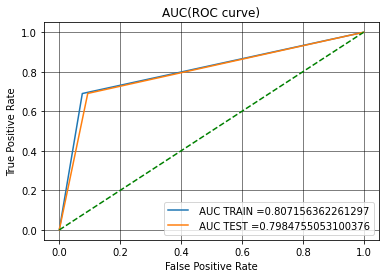

In [37]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()